Final cost: 118.996979


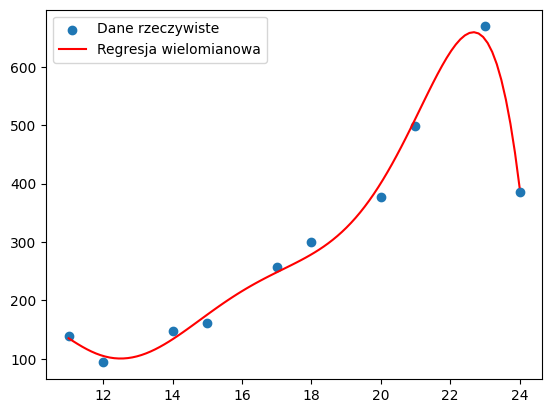

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import csv
import numpy as np
import matplotlib.pyplot as plt

def h_fun(X, theta):
    return theta.T @ X

def calculate_cost(X, y, theta):
    m = y.shape[1]
    h = h_fun(X, theta)
    cost = (1 / (2 * m)) * np.sum((h - y) ** 2)
    return cost

def gradient_descent(X, y, theta, alpha, eps, max_iter=10000):
    m = y.shape[1]
    previous_cost = calculate_cost(X, y, theta)
    for i in range(max_iter):
        h_y_diff = h_fun(X, theta) - y
        gradient = (h_y_diff @ X.T) / m
        theta -= alpha * gradient.T
        current_cost = calculate_cost(X, y, theta)
        if abs(previous_cost - current_cost) < eps:
            break
        previous_cost = current_cost
    return theta


with open('./lin_reg_training.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = np.array([row for row in csvreader], dtype=np.float32)

x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(1, -1)


scaler = StandardScaler()
x_train = scaler.fit_transform(x)


degree = 6
poly = PolynomialFeatures(degree)
x_train_poly = poly.fit_transform(x_train).T  

theta = np.zeros((x_train_poly.shape[0], 1))


alpha = 0.01
eps = 1e-6
theta_opt = gradient_descent(x_train_poly, y, theta, alpha, eps)


final_cost = calculate_cost(x_train_poly, y, theta_opt)
print(f'Final cost: {final_cost:.6f}')


plt.scatter(x, y, label='Dane rzeczywiste')
x_range = np.linspace(min(x), max(x), 100).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range)
x_range_poly = poly.transform(x_range_scaled).T
y_pred = h_fun(x_range_poly, theta_opt)
plt.plot(x_range, y_pred.T, color='red', label='Regresja wielomianowa')
plt.legend()
plt.show()


Final cost (training): 552.313585
Final cost (test): 6282.088541


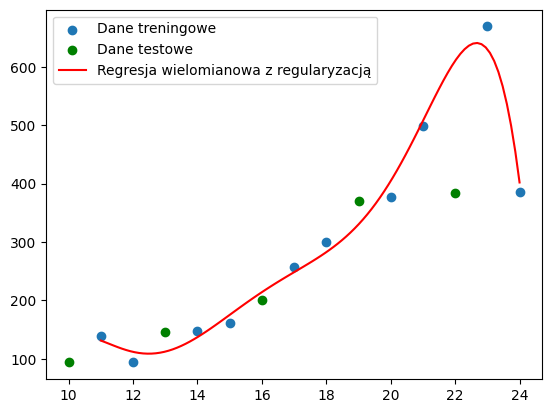

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import csv
import numpy as np
import matplotlib.pyplot as plt

def h_fun(X, theta):
    return theta.T @ X

def calculate_cost(X, y, theta, lambda_ = 0):
    m = y.shape[1]
    h = h_fun(X, theta)
    regularization = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)
    cost = (1 / (2 * m)) * np.sum((h - y) ** 2) + regularization
    return cost

def gradient_descent(X, y, theta, alpha, eps, lambda_, max_iter=10000):
    m = y.shape[1]
    previous_cost = calculate_cost(X, y, theta, lambda_)
    for i in range(max_iter):
        h_y_diff = h_fun(X, theta) - y
        gradient = (X @ h_y_diff.T) / m + (lambda_ / m) * np.vstack(([0], theta[1:]))
        theta -= alpha * gradient
        current_cost = calculate_cost(X, y, theta, lambda_)
        if abs(previous_cost - current_cost) < eps:
            break
        previous_cost = current_cost
    return theta


with open('./lin_reg_training.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = np.array([row for row in csvreader], dtype=np.float32)

x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(1, -1)


with open('./lin_reg_test.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data2 = np.array([row for row in csvreader], dtype=np.float32)

x2 = data2[:, 0].reshape(-1, 1)
y2 = data2[:, 1].reshape(1, -1)


scaler = StandardScaler()
x_train = scaler.fit_transform(x)
x_test = scaler.transform(x2)


degree = 6
poly = PolynomialFeatures(degree)
x_train_poly = poly.fit_transform(x_train).T  
x_test_poly = poly.transform(x_test).T

theta = np.zeros((x_train_poly.shape[0], 1))


alpha = 0.01
eps = 1e-6
lambda_ = 0.1  
theta_opt = gradient_descent(x_train_poly, y, theta, alpha, eps, lambda_)


final_cost = calculate_cost(x_train_poly, y, theta_opt, lambda_)
test_cost = calculate_cost(x_test_poly, y2, theta_opt, lambda_)
print(f'Final cost (training): {final_cost:.6f}')
print(f'Final cost (test): {test_cost:.6f}')


plt.scatter(x, y, label='Dane treningowe')
plt.scatter(x2, y2, label='Dane testowe', color='green')
x_range = np.linspace(min(x), max(x), 100).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range)
x_range_poly = poly.transform(x_range_scaled).T
y_pred = h_fun(x_range_poly, theta_opt)
plt.plot(x_range, y_pred.T, color='red', label='Regresja wielomianowa z regularyzacją')
plt.legend()
plt.show()


lambda=10, cost=5686.0580, test_cost=3714.0814
lambda=1, cost=1001.2223, test_cost=2605.1348
lambda=0.01, cost=124.7319, test_cost=6523.5969
lambda=0.001, cost=119.5538, test_cost=6655.6058


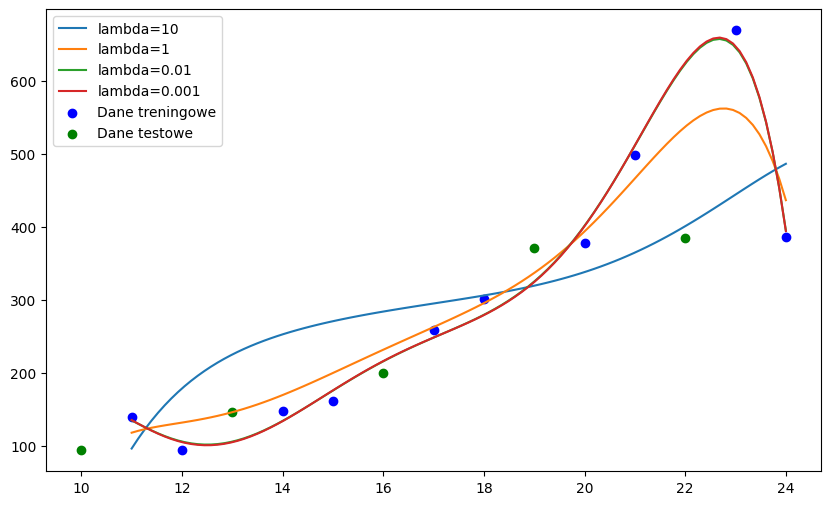

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import csv
import numpy as np
import matplotlib.pyplot as plt

def h_fun(X, theta):
    return theta.T @ X

def calculate_cost(X, y, theta, lambda_=0):
    m = y.shape[1]
    h = h_fun(X, theta)
    lin_reg_cost = (1 / (2 * m)) * np.sum((h - y) ** 2)
    sum_of_thetas = (theta[1:, :] ** 2).sum()
    return lin_reg_cost + sum_of_thetas * lambda_ / (2 * m)

def gradient_descent(X, y, theta, alpha, eps, lambda_, max_iter=10000):
    m = y.shape[1]
    previous_cost = calculate_cost(X, y, theta, lambda_)
    for i in range(max_iter):
        h_y_diff = h_fun(X, theta) - y
        gradient = (X @ h_y_diff.T) / m + (lambda_ / m) * np.vstack(([0], theta[1:]))
        theta -= alpha * gradient
        current_cost = calculate_cost(X, y, theta, lambda_)
        if abs(previous_cost - current_cost) < eps:
            break
        previous_cost = current_cost
    return theta

with open('./lin_reg_training.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = np.array([row for row in csvreader], dtype=np.float32)

x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(1, -1)

with open('./lin_reg_test.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data2 = np.array([row for row in csvreader], dtype=np.float32)

x2 = data2[:, 0].reshape(-1, 1)
y2 = data2[:, 1].reshape(1, -1)

scaler = StandardScaler()
x_train = scaler.fit_transform(x)
x_test = scaler.transform(x2)
h
degree = 6
poly = PolynomialFeatures(degree)
x_train_poly = poly.fit_transform(x_train).T  
x_test_poly = poly.transform(x_test).T


theta = np.zeros((x_train_poly.shape[0], 1))

lambdas = [10, 1, 0.01, 0.001]
plt.figure(figsize=(10, 6))

for lambda_ in lambdas:
    theta_opt = gradient_descent(x_train_poly, y, theta.copy(), alpha=0.01, eps=1e-6, lambda_=lambda_)
    final_cost = calculate_cost(x_train_poly, y, theta_opt, lambda_=0)
    test_cost = calculate_cost(x_test_poly, y2, theta_opt, lambda_=0)
    print(f'lambda={lambda_}, cost={final_cost:.4f}, test_cost={test_cost:.4f}')
    
    x_range = np.linspace(min(x), max(x), 100).reshape(-1, 1)
    x_range_scaled = scaler.transform(x_range)
    x_range_poly = poly.transform(x_range_scaled).T
    y_pred = h_fun(x_range_poly, theta_opt)
    plt.plot(x_range, y_pred.T, label=f'lambda={lambda_}')

plt.scatter(x, y, label='Dane treningowe', color='blue')
plt.scatter(x2, y2, label='Dane testowe', color='green')
plt.legend()
plt.show()